In [125]:
# Importing Packages
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import matplotlib.pyplot as plt
%matplotlib inline

The Fashion MNIST datasets has 70,000 28x28 grayscale images. The class labels are :


---


Label	Description

0 T-shirt/top


1	Trouser

2	Pullover

3	Dress

4	Coat

5	Sandal

6	Shirt

7	Sneaker

8	Bag

9	Ankle boot

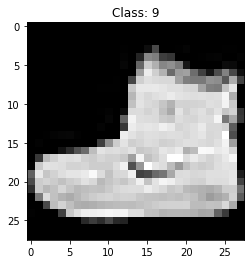

<Figure size 432x288 with 0 Axes>

In [142]:
# Loading Dataset 60000 train, 10000 test
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train),(X_test, y_test) = fashion_mnist.load_data()
plt.imshow(X_train[0],cmap='gray')
plt.title('Class: {}'.format(y_train[0]));
plt.figure();

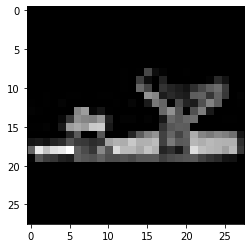

In [127]:
plt.imshow(X_train[59999],cmap='gray') # matrix 28x28

In [128]:
y_train.shape

(60000,)

In [129]:
len(y_test)

10000

In [130]:
X_train.shape

(60000, 28, 28)

<Figure size 432x288 with 0 Axes>

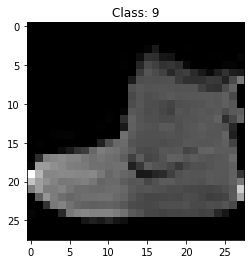

<Figure size 432x288 with 0 Axes>

In [131]:
X_test0 = X_test.copy() #for plotting images

# Normalizing the Data
from tensorflow.keras.utils import normalize
X_train = normalize(X_train, axis = 1) # == X_train/255
X_test = normalize(X_test, axis = 1)   # == X_test/255
plt.imshow(X_train[0],cmap='gray')
plt.title('Class: {}'.format(y_train[0]))
plt.figure()

In [132]:
# add empty color dimension
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [133]:
X_train.shape

(60000, 28, 28, 1)

In [138]:
# Defining the Model
model = Sequential()
model.add(Flatten(input_shape=((28,28,1))))
model.add(Dense(200, activation="relu"))
model.add(Dense(10, activation="softmax"))

# Compiling the Model
model.compile(optimizer = "adam", loss="sparse_categorical_crossentropy", metrics = ["accuracy"])

# Fitting the Model
history = model.fit(X_train, 
          y_train, 
          epochs = 10 ,
          batch_size =20)


Epoch 1/10
3000/3000 [==============================] - 7s 2ms/step - loss: 0.6018 - accuracy: 0.7870
Epoch 2/10
3000/3000 [==============================] - 7s 2ms/step - loss: 0.3624 - accuracy: 0.8654
Epoch 3/10
3000/3000 [==============================] - 7s 2ms/step - loss: 0.3188 - accuracy: 0.8812
Epoch 4/10
3000/3000 [==============================] - 7s 2ms/step - loss: 0.2878 - accuracy: 0.8927
Epoch 5/10
3000/3000 [==============================] - 7s 2ms/step - loss: 0.2731 - accuracy: 0.8951
Epoch 6/10
3000/3000 [==============================] - 7s 2ms/step - loss: 0.2532 - accuracy: 0.9037
Epoch 7/10
3000/3000 [==============================] - 7s 2ms/step - loss: 0.2437 - accuracy: 0.9070
Epoch 8/10
3000/3000 [==============================] - 7s 2ms/step - loss: 0.2272 - accuracy: 0.9145
Epoch 9/10
3000/3000 [==============================] - 7s 2ms/step - loss: 0.2168 - accuracy: 0.9179
Epoch 10/10
3000/3000 [==============================] - 7s 2ms/step - loss: 0.209

In [140]:
history.history

{'accuracy': [0.8274999856948853,
  0.8690000176429749,
  0.881600022315979,
  0.8915166854858398,
  0.8972499966621399,
  0.9026333093643188,
  0.9076499938964844,
  0.9131500124931335,
  0.9172333478927612,
  0.9205499887466431],
 'loss': [0.4755626916885376,
  0.3544628322124481,
  0.3165079653263092,
  0.29116612672805786,
  0.27261075377464294,
  0.256915807723999,
  0.24273869395256042,
  0.23017945885658264,
  0.2198551595211029,
  0.20928308367729187]}

In [ ]:
# Evaluating on the Test Data
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.3805 - accuracy: 0.8611


[0.38051703572273254, 0.8611000180244446]

In [141]:
# Predict the first 10 images, Probability Distribution
pred = model.predict(X_test[:10])
pred

array([[2.3203405e-08, 4.4543772e-17, 2.7721542e-10, 4.8157568e-11,
        1.5415036e-10, 3.1668616e-05, 1.0365059e-08, 8.3223833e-03,
        9.5696978e-11, 9.9164587e-01],
       [1.9260548e-04, 4.7986949e-12, 9.9775010e-01, 8.5437026e-09,
        2.7245705e-04, 6.0828498e-08, 1.7845614e-03, 1.3298365e-10,
        1.0539772e-07, 1.1363321e-08],
       [1.6841295e-06, 9.9999821e-01, 6.9706230e-10, 5.2316061e-08,
        3.2221754e-09, 1.1597485e-11, 7.2558052e-08, 6.0487618e-13,
        5.7350047e-10, 8.3263257e-13],
       [1.2709109e-08, 9.9999952e-01, 2.6903299e-11, 5.2606288e-07,
        2.8626808e-09, 2.2368617e-12, 2.7588585e-09, 6.1906507e-14,
        2.4440476e-11, 9.9969414e-13],
       [7.5459927e-02, 1.5746653e-10, 1.3675968e-03, 2.1540436e-04,
        5.1849789e-04, 5.1794314e-07, 9.2243141e-01, 6.0875124e-08,
        4.7437069e-07, 6.1314436e-06],
       [9.4793824e-04, 9.9890864e-01, 5.9189492e-06, 8.0344234e-06,
        7.0877581e-06, 9.4925255e-11, 1.2192436e-04, 5.80

In [ ]:
res = np.argmax(pred, axis=1)
print(res)
print(y_test[:10])

[9 2 1 1 6 1 4 6 5 7]
[9 2 1 1 6 1 4 6 5 7]


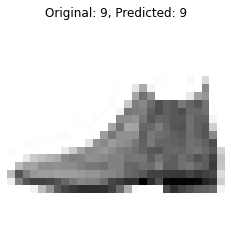

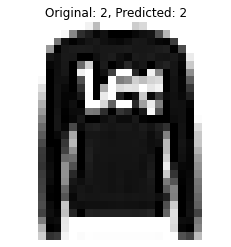

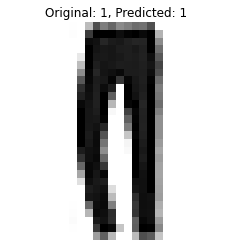

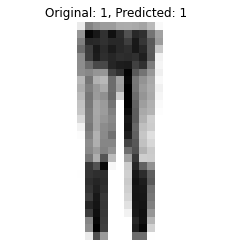

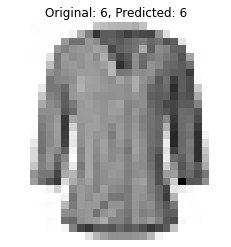

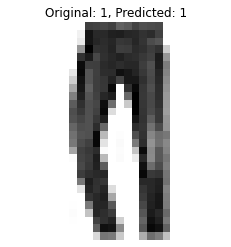

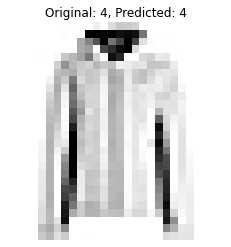

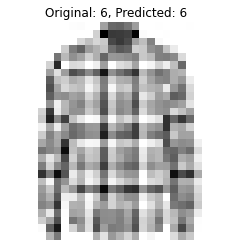

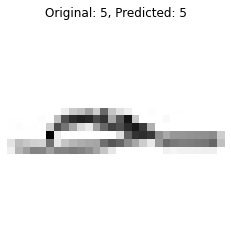

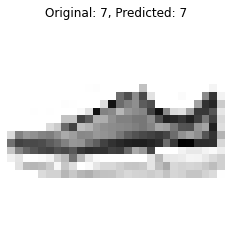

<Figure size 432x288 with 0 Axes>

In [ ]:
# Visualizing the result
# Visualizing the result
for i in range(10):
  plt.imshow(X_test0[i], cmap="binary")
  plt.title('Original: {}, Predicted: {}'.format(y_test[i], res[i]))
  plt.axis("Off")
  plt.figure()